<a href="https://colab.research.google.com/github/saisrigundam/GB_656_Machine_Learning/blob/main/Bike_Sharing_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bike Sharing System**
Bike-sharing systems permit people to borrow and return a bike from a bike station to another station that belongs to the same network. Currently there are around 500 bike-sharing companies around the world. Our goal in this project is to understand and predict daily bike rentals using linear regression.




### **Import the required libraries**
Firstly, import the libraries which we will require for the computations that we will perform throughout this project.
Pandas library is used for data manipulation and analysis.
NumPy is used for performing mathematical and logical operations on large, multi-dimensional arrays and matrices.
Seaborn is a library that uses Matplotlib underneath to plot graphs. Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.
The train_test_split function of the sklearn. model_selection package in Python splits arrays or matrices into random subsets for train and test data.
Sklearn metrics let us assess the quality of our predictions.





In [ ]:
# Load the appropriate Python libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set(style="darkgrid")

### **Reading the data into Python**
Reading data
using pandas, we read bike rental data into a Dataframe which we will call bike.



In [ ]:
# Read the CSV file with bike rental data.
url = 'http://bit.ly/bike-data'
df_bike = pd.read_csv(url)

Check the number of columns and rows in our dataset using the shape function

In [ ]:
# Check the dimensions of the dataset.
df_bike.shape

(731, 14)

### **Data Description**

The business meaning of each column in the data is as below


*   ID: index/row number
*   date: date in the format mm/dd/yyyy

*   season: The current season (1, 2, 3, 4)
*   yr: year (0: 2011, 1:2012)

*   mnth: month ( 1 to 12)
*   holiday: weather day is holiday or not (0-not a holiday, 1-holiday)

*   weekday: day of the week (0-6)
*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0
*  temp: Normalized temperature in Celsius.
*   atemp: Normalized feeling temperature in Celsius.
* hum: Normalized humidity. The values are divided to 100 (max)
*  windspeed: Normalized wind speed. The values are divided to 67 (max)
*   casual rentals: count of casual bike rentals
*   registered rentals: count of registered rentals









### **Explore the Data**
Check the datatypes of each column in the dataset along with column name and number of values in each column (Non-Null Count)

In [ ]:
# List the columns and their data types.
df_bike.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  731 non-null    int64  
 1   date                731 non-null    object 
 2   yr                  731 non-null    int64  
 3   mnth                731 non-null    int64  
 4   weekday             731 non-null    int64  
 5   season              731 non-null    int64  
 6   holiday             731 non-null    int64  
 7   working_day         731 non-null    int64  
 8   temp                731 non-null    float64
 9   atemp               731 non-null    float64
 10  hum                 731 non-null    float64
 11  windspeed           731 non-null    float64
 12  casual_rentals      731 non-null    int64  
 13  registered_rentals  731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


Preview the dataset using the head function which displays first five rows of the dataset. This helps us gain an understanding of the data. We can see the format of months(1-12), weekday(0-6), season(1-4), working_day = 0(weekend), 1(weekday). The values of temp, atemp, hum, windspeed are normalised.

In [ ]:
# Preview the first 5 records of the dataset
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


### **Add a new column to the dataset**
Create a new column total_rentals which is sums the casual_rentals and registered_rentals column to give us the total number of bike rentals on any particular day. Preview the values.

In [ ]:
# Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns
df_bike['total_rentals'] = df_bike['casual_rentals'] + df_bike['registered_rentals']

In [ ]:
# Confirm this new column was calculated correctly by previewing a few records.
df_bike.head()

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Generate descriptive stats**
Using the describe(), we get a summary of some important measures of the spread of the data. For example, we can see that the average number of total_rentals is 4504 and the minimum total_rentals = 22 and maximum = 8714.

In [ ]:
# Generate descriptive stats for the numeric columns in the dataset.
df_bike.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Create a pivot table**
Create a pivot that to gain an understanding of what are the total and the average of total rentals on a monthly basis in the year'0' and year'1'

In [ ]:
#Create a pivot table that has "yr" and "mnth" as indices (in that order) and that sums and averages "total_rentals"
pd.pivot_table(df_bike, index=['yr', 'mnth'], values=['total_rentals'], aggfunc=[np.sum, np.mean])

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

We can see that the average rentals are lowest in the month of january for both the years. It can also be observered that average rentals for each month have increased from year 0 to year 1.

In [ ]:
#Create a pivot table that has "season" as indices and that sums and averages "total_rentals"
pd.pivot_table(df_bike, index=['season'], values=['total_rentals'], aggfunc=[np.sum, np.mean])

,sum,mean
,total_rentals,total_rentals
season,,
1,471348,2604.132597
2,918589,4992.331522
3,1061129,5644.303191
4,841613,4728.162921


### **Check for null values**
Check to see if there are any null values in the dataset and majority of the models requires that there are no missing values in the dataset to get a better fit and prediction. As there are no null we are good to go.

In [ ]:
# Determine whether or not there are any missing values in the dataset.
df_bike.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

In [ ]:
# Check to see if there are any duplicate values in the dataset
df_bike.duplicated().sum()

0

## **Data Visualization**

### **Histogram**

A Histogram represents the distribution of a numeric variable for one or several groups. The values are split in bins, each bin is represented as a bar. (Check to see if the distribution is good) The X-axis shows the range of values and Y-axis represent the number of values in that range.

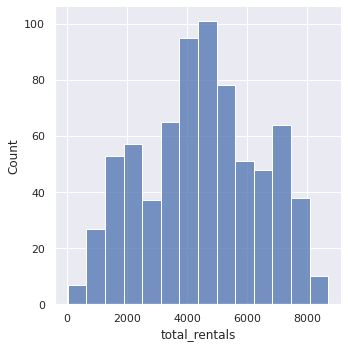

In [ ]:
# Generate a histogram to visualize the distribution of data in the 'total_rentals' column
sns.displot(df_bike, x="total_rentals");


For example, in the above histogram of "total_rentals", there are around 100 rows in data that has a value between 4000 to 5000. The ideal outcome for histogram is a bell curve or slightly skewed bell curve and we can see that our distribution is ideal

### **Scatterplot**

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another.

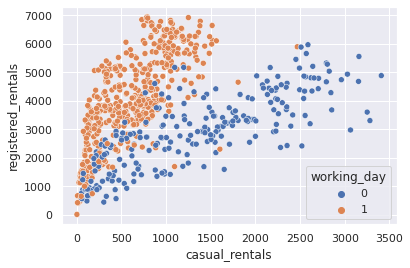

In [ ]:
# Generate a scatterplot with 'casual_rentals' on x-axis and 'registered_rentals' on y-axis, color the datapoints based on'working_day' (To understand the rentals on weekdays vs weekends)
sns.scatterplot(x="casual_rentals", y="registered_rentals", hue="working_day", data=df_bike);

Create a scatterplot to understand how 'casual_rentals' and 'registered_rentals' vary basis the working days. We can see from the plot that during the weekdays the number of 'registered_rentals is high when compared to 'casual_rentals'.

### **Swarmplot**

It is used in cases where we want to show all observations along with some representation of the underlying distribution.

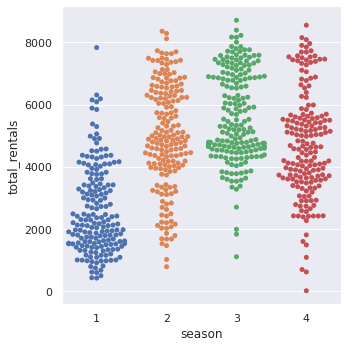

In [ ]:
# Generate a swarmplot to explore the 'total_rentals' by season ('season' on x-axis and 'total_rentals' on y-axis)
sns.catplot(x="season", y="total_rentals", kind = "swarm", data = df_bike);

From the plot is can be observed that most of the data points for season 1 are towards the lower end when compared to the rest of the seasons. Season 3 has more values spread towards the higher end and hence might have a higher average of total_rentals

### **Lineplot**

Line Plots display numerical values on one axis, and categorical values on the other. It can be used for both simple and complex visualizations.

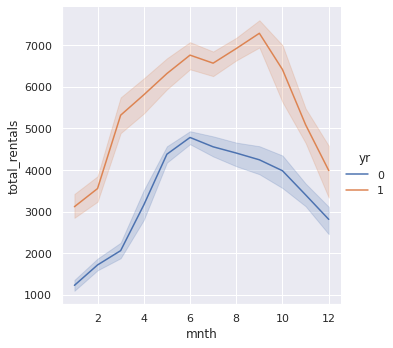

In [ ]:
# Generate a lineplot that shows average daily rentals by month and split the line by year. ('mnth' on x-axis and 'total_rentals' on y-axis and there should be a line for each value in 'yr' column)
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=df_bike);

It can be observed from the above graph that the total_rentals were higher during the year 1 when compared to year 0.

### **Pairplot**

A pairs plot is a matrix of scatterplots that lets us understand the pairwise relationship between different variables in a dataset.

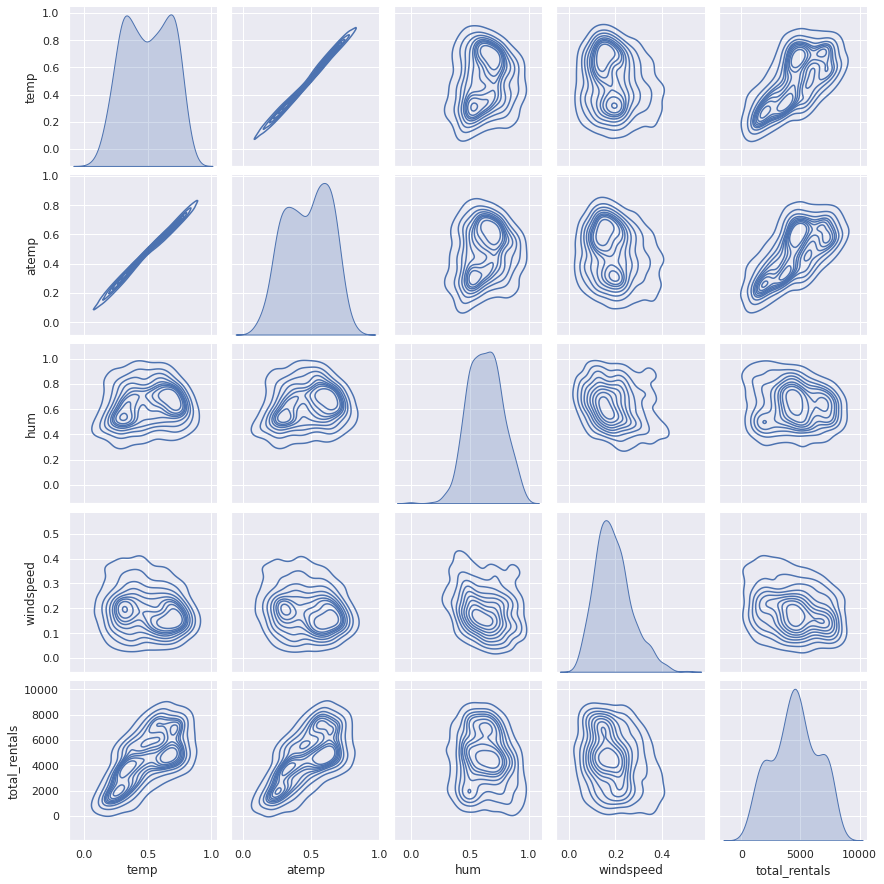

In [ ]:
# Generate a pairplot to show relationship between 'total_rentals' and weather indicators which are continuous variables.
sns.pairplot(df_bike.iloc[:, [8,9,10,11,14]], kind= "kde");

We can observe in the above graph that 'temp' and 'atemp' have high positive correlation (one variable tends to increase as the other increases) as the graph tends to be linear. Also, as the temp increases the total_rentals also seems to increase.

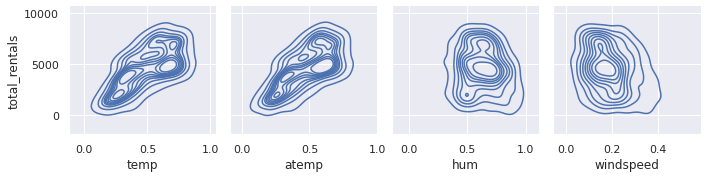

In [ ]:
# Generate a pairplot to show relationship between 'total_rentals' and weather indicators which are continuous variables.
#sns.pairplot(df_bike.iloc[:, [8,9,10,11,14]], kind= "kde");

sns.pairplot(df_bike, y_vars =['total_rentals'], x_vars=['temp','atemp','hum','windspeed'], kind= "kde");

### **Correlation Heatmap**

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data

Select the required columns ('total_rentals', 'temp','atemp', 'hue', 'windspeed' and store them in a new dataframe df_bikes_heat which can be used to create a heatmap in order to visualize the correlation between them.

In [ ]:
# Select a specific set of rows and columns by position.
df_bikes_heat = df_bike.iloc[:, [14,8,9,10,11]]

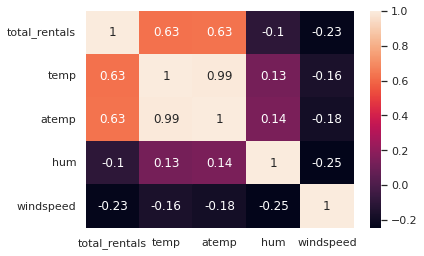

In [ ]:
# Create heatmap to visualize the correlation between "total_rentals" and the weather indicators ("temp","atemp", "hum", and "windspeed")
sns.heatmap(df_bikes_heat.corr(), annot=True);

The correlation coefficient 'temp' and 'atemp' is high(i.e ~1), and the coefficient of 'temp' and 'total_rentals' is same as 'atemp' and 'total_rentals' so we will consider only one of these variables while performing linear regression. Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation and hence we will not take those into consideration.

## **Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable. We will use this model to predict daily bike rentals

As in our study we have one dependent and one independent variable we will perform simple linear regression. From bike-data, we create a new Dataframe X containing the column 'temp' (independent variable) and a series y containing only the total_rentals (dependent variable). These will be our design matrix and target respectively for our linear regression model.

In [ ]:
# Separate the independent variables(X) from the dependent varibale(y)
X = df_bike['temp']
y = df_bike['total_rentals']

### **Split the data into training and testing sample**
We perform a test-train split to create X_train, X_test, y_train and y_test.

The rental bike data is therefore partitioned into two namely, training set for building the regression and testing set for assessing the model performance. Usually larger part of data is need to teach the models and so the 75% of the final data is utilized for model training and the remaining 25%
of the data is used for testing purpose.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# reshape(-1, 1) if your data has a single feature or array. reshape(1, -1) if it contains a single sample. We could change our Series into a NumPy array and then reshape it to have two dimensions.
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

### **Train the regression model**
We create and train a linear regression model using X_train and y_train

In [ ]:
# Train the regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Identify intercepts and coefficients
print(model.intercept_)
print(model.coef_)

[1327.93081037]
[[6463.96764523]]


The intercept of the regression equation is 1327.93 and the coefficient of temp variable is 6463.97. With the help of these we can build the regression equation and use it to predict values.

### **Predict values using the model**

In [ ]:
# Predict total_rentals when the temp=0.3
new_X=[[0.30]]
model.predict(new_X)

array([[3267.12110394]])

The predicted value of total_rentals when the temp=0.3 is 3267.12

Now, we pass the test data values that we stored in X_test to the predict() menthod and assign the resultant values to y_pred.

In [ ]:
# Predict total_rentals in the test data and store it in y_pred
y_pred = model.predict(X_test)
y_pred

array([[5766.52408142],
       [6175.90654429],
       [2836.18777293],
       [2570.13732862],
       [3536.45524381],
       [4279.81152301],
       [4365.99560363],
       [4252.87616984],
       [4155.91665516],
       [2643.20601889],
       [2260.99161202],
       [3428.72029507],
       [3683.06449397],
       [5901.18791937],
       [6154.36214013],
       [5432.55026509],
       [5098.57644877],
       [3843.49370696],
       [3288.6655081 ],
       [4110.24872374],
       [5895.80343432],
       [2965.46712584],
       [3391.01597179],
       [5804.22840469],
       [2378.32555272],
       [5437.93475014],
       [6811.52787475],
       [5572.60505206],
       [4748.44917729],
       [5098.57644877],
       [2222.11084664],
       [5561.829618  ],
       [4215.17184656],
       [5820.38832381],
       [3741.14324327],
       [3369.46510367],
       [6348.28116949],
       [6897.71841933],
       [4010.47738314],
       [4290.58049311],
       [5012.39236815],
       [3677.440

Compare the actual and predicted values. This is done to detect overfitting or underfitting problems.



In [ ]:
# Compare the actual and predicted values to gain an understanding of the model
df_compare = pd.DataFrame({'Actual' : [y_test] , 'Predicted' : [y_pred]})
df_compare.head(10)

,Actual,Predicted
0,"[[5923], [4592], [1248], [1360], [4075], [1817...","[[5766.524081418054], [6175.906544293631], [28..."


### **Calculate R-squared**

R-squared is a statistical method that determines the goodness of fit. It measures the strength of the relationship between the dependent and independent variables on a scale of 0-100%. The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model. It is also called a coefficient of determination.


In [ ]:
# Generate the R squared
metrics.r2_score(y_test, y_pred)

0.37540464616240443

The R-squared for our model is 0.3754 (i.e the strength of relationship between our variables 'temp' and 'total_rentals' is 37.54%). The value of R-squared above 0.95 tell us the model is a very good fit and above 0.75 is considered to be moderate/sufficient and anything below that is considered weak.